In [247]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

from mlxtend.frequent_patterns import apriori,association_rules

from sklearn.preprocessing import OneHotEncoder


# Movies

In [5]:
pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
     -                                        0.1/1.4 MB 1.7 MB/s eta 0:00:01
     -----                                    0.2/1.4 MB 2.0 MB/s eta 0:00:01
     --------                                 0.3/1.4 MB 2.1 MB/s eta 0:00:01
     --------                                 0.3/1.4 MB 2.1 MB/s eta 0:00:01
     -------------                            0.5/1.4 MB 1.9 MB/s eta 0:00:01
     -------------------                      0.7/1.4 MB 2.4 MB/s eta 0:00:01
     ---------------------                    0.7/1.4 MB 2.3 MB/s eta 0:00:01
     ----------------------------             1.0/1.4 MB 2.7 MB/s eta 0:00:01
     ---------------------------------        1.1/1.4 MB 2.8 MB/s eta 0:00:01
     --------------------------------------   1.3/1.4 MB 2.9 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [110]:
data = pd.read_csv("my_movies (1).csv")

In [112]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [113]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [114]:
len(data)

10

In [115]:
data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [116]:
data.shape

(10, 15)

In [ ]:
#PREPROCESSING

In [145]:
data.fillna(0, inplace=True)


In [146]:
data.isna().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [147]:
df=pd.get_dummies(data)# one hot encoding
df.head(5)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_Patriot,V3_0,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_0,V4_Green Mile,V5_0,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
4,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0


In [153]:
df = df.iloc[:,0:10]

In [295]:
df.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [154]:
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [155]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

V1
Gladiator        6
Sixth Sense      2
LOTR1            1
Harry Potter1    1
Name: V1, dtype: int64

V2
Patriot          6
LOTR1            1
LOTR2            1
Harry Potter2    1
LOTR             1
Name: V2, dtype: int64

V3
Sixth Sense      4
0                3
Harry Potter1    1
Braveheart       1
Gladiator        1
Name: V3, dtype: int64

V4
0             8
Green Mile    2
Name: V4, dtype: int64

V5
0        9
LOTR2    1
Name: V5, dtype: int64

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



# Apriori Algorithmn

In [248]:
frequent_itemsets = apriori(df, min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [249]:
frequent_itemsets["itemsets"].apply(lambda x : len(x)).value_counts()

# 1 item sets count is 10
# 2 item sets count is 20
# 3 item set count is 16 and so on in which the min support is 0.1

2    20
3    16
1    10
4     6
5     1
Name: itemsets, dtype: int64

In [250]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 0.5 )

In [251]:
rules


# a = sixthsense  , b = gladiator . supp (gladiator) = 0.7 , conf = sup(a and b) / supp(a ) = 0.5/0.6 = 0.83

# eg : a = sixth sense , b = gladiator . supp ( gladiator) = 0.7 , confidence = 0.83 . which is the the probability of watching 
# gladiator increases from 70% to 83% given they have also watched sixth sense.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
...,...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
248,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [252]:
rules[rules.confidence > 0.60]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
11,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
239,"(Sixth Sense, LOTR1)","(Harry Potter1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
241,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
242,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
243,"(Sixth Sense, Harry Potter1)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000


In [253]:
rules[rules.consequents==frozenset({'Gladiator'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
15,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
17,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
19,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
21,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.6,-0.333333
41,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
47,"(Sixth Sense, LOTR)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
53,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.6,-0.333333
102,"(Patriot, Braveheart)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
108,"(LOTR, Green Mile)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333


In [254]:
support_thresholds = [0.1, 0.2, 0.3]
confidence_thresholds = [0.5, 0.6, 0.7]
no_of_rules = []
for i in support_thresholds:
    frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
    for j in confidence_thresholds:
        rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=j)
        print(f"Support={i}, Confidence={j}","*********","The no of rules is ",len(rules))
        print("*****************************************")
        print(rules)

Support=0.1, Confidence=0.5 ********* The no of rules is  216
*****************************************
                antecedents                                      consequents  \
0             (Sixth Sense)                                      (Gladiator)   
1               (Gladiator)                                    (Sixth Sense)   
2                   (LOTR1)                                    (Sixth Sense)   
3           (Harry Potter1)                                    (Sixth Sense)   
4             (Sixth Sense)                                        (Patriot)   
..                      ...                                              ...   
211  (Harry Potter1, LOTR2)                 (Sixth Sense, LOTR1, Green Mile)   
212            (Green Mile)       (Sixth Sense, LOTR1, Harry Potter1, LOTR2)   
213                 (LOTR1)  (Sixth Sense, Harry Potter1, LOTR2, Green Mile)   
214                 (LOTR2)  (Sixth Sense, LOTR1, Harry Potter1, Green Mile)   
215         (Har

In [262]:
support_thresholds = [0.1, 0.2, 0.3]
confidence_thresholds = [0.5, 0.6, 0.7]
no_of_rules = []
for i in support_thresholds:
    frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
    for j in confidence_thresholds:
        rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=j)
        print(f"Support={i}, Confidence={j}","*********","The no of rules is ",len(rules))
        #no_of_rules.append(len(rules))
        #print(no_of_rules)



Support=0.1, Confidence=0.5 ********* The no of rules is  216
Support=0.1, Confidence=0.6 ********* The no of rules is  134
Support=0.1, Confidence=0.7 ********* The no of rules is  129
Support=0.2, Confidence=0.5 ********* The no of rules is  15
Support=0.2, Confidence=0.6 ********* The no of rules is  14
Support=0.2, Confidence=0.7 ********* The no of rules is  9
Support=0.3, Confidence=0.5 ********* The no of rules is  12
Support=0.3, Confidence=0.6 ********* The no of rules is  11
Support=0.3, Confidence=0.7 ********* The no of rules is  6


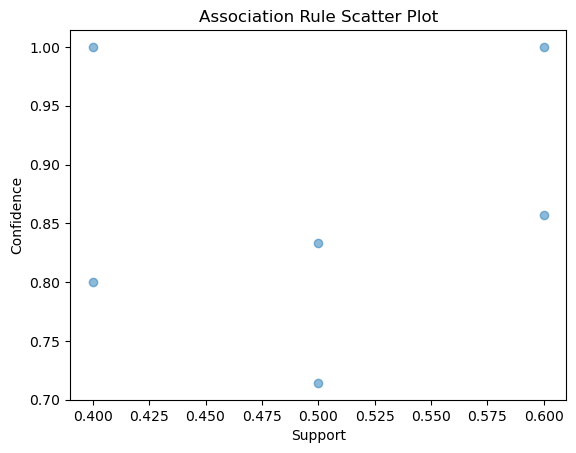

In [263]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rule Scatter Plot')
plt.show()

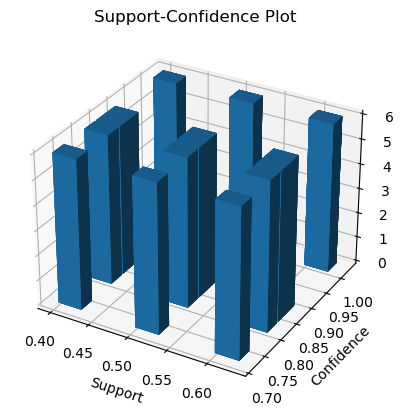

In [209]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = rules["support"]
y = rules["confidence"]
xpos, ypos = np.meshgrid(x, y)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = 0
dx = dy = 0.03
dz = len(rules)

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Number of Rules')
plt.title('Support-Confidence Plot')
plt.show()







In [227]:
results_df = pd.DataFrame(columns=['Support', 'Confidence', 'No_of_Rules'])

support_thresholds = [0.1, 0.2, 0.3]
confidence_thresholds = [0.5, 0.6, 0.7]

for i in support_thresholds:
    frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
    for j in confidence_thresholds:
        rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=j)
        no_of_rules = len(rules)
        #print(f"Support={i}, Confidence={j}","*********","The no of rules is ",len(rules))
        results_df = results_df.append({'Support': i, 'Confidence': j, 'No_of_Rules': no_of_rules}, ignore_index=True)

results_df


,Support,Confidence,No_of_Rules
0,0.1,0.5,216.0
1,0.1,0.6,134.0
2,0.1,0.7,129.0
3,0.2,0.5,15.0
4,0.2,0.6,14.0
5,0.2,0.7,9.0
6,0.3,0.5,12.0
7,0.3,0.6,11.0
8,0.3,0.7,6.0


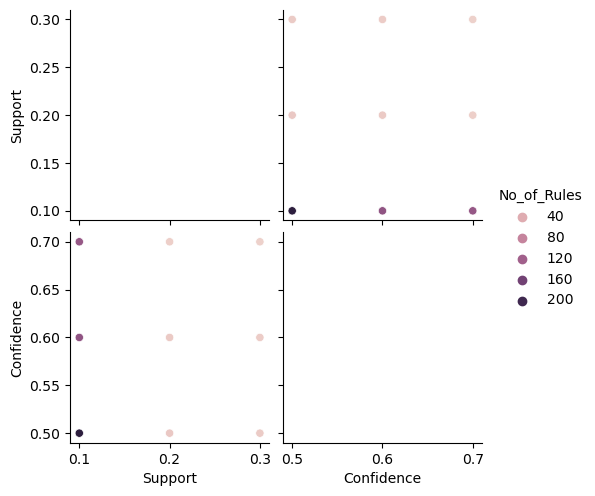

In [230]:
sns.pairplot(data = results_df , hue = 'No_of_Rules')

<Axes: xlabel='Support', ylabel='Confidence'>

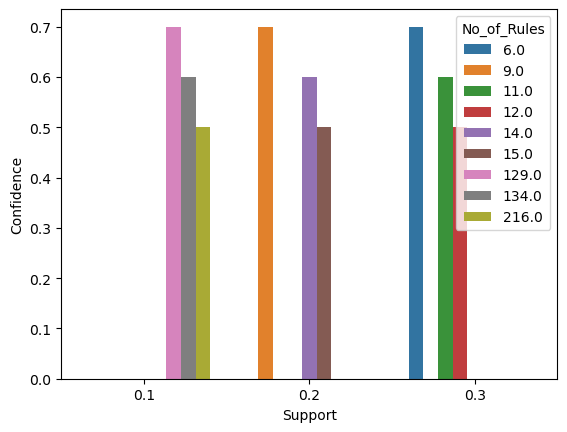

In [260]:

fig.figsize = (20,20)
sns.barplot(x ="Support" , y = "Confidence", data = results_df , hue ="No_of_Rules" )

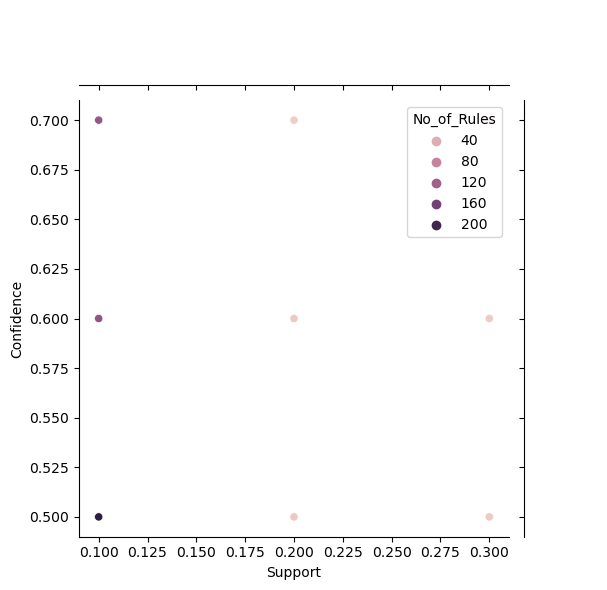

In [261]:
sns.jointplot(x="Support",y="Confidence",data=results_df,hue="No_of_Rules",)


#  BOOKS DATA 

In [264]:
books = pd.read_csv("book.csv")

In [265]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [266]:
books.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [268]:
for i in books.columns:
    print(i)
    print(books[i].value_counts())

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64
YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64
CookBks
0    1138
1     862
Name: CookBks, dtype: int64
DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64
RefBks
0    1571
1     429
Name: RefBks, dtype: int64
ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64
GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64
ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64
ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64
ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64
Florence
0    1783
1     217
Name: Florence, dtype: int64


In [275]:
frequent_itemsets = apriori(books , min_support = 0.1, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [281]:
Rules = association_rules(frequent_itemsets , min_threshold = 0.3 , metric = "confidence")
#rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=j)


In [283]:
Rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
84,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
85,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
86,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
87,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


#  Applying few filters 

In [285]:
Rules[Rules.confidence > 0.6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
3,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
8,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
13,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
20,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
23,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
24,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047


# Trying for different  values of support and confidence

In [ ]:
support_thresholds = [0.1,0.2,0.3,0.4]
confidence_thresholds = [0.5,0.6,0.7,0.8]

for i in support_thresholds:
    frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
    for j in confidence_thresholds:
        rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=j)
        no_of_rules = len(rules)
        #print(f"Support={i}, Confidence={j}","*********","The no of rules is ",len(rules))
        results_df = results_df.append({'Support': i, 'Confidence': j, 'No_of_Rules': no_of_rules}, ignore_index=True)

results_df

In [288]:
support_thresholds = [0.1,0.2,0.3,0.4]
confidence_thresholds = [0.5,0.6,0.7,0.8]


for i in support_thresholds:
    frequent_itemsets = apriori(books , min_support = i , use_colnames= True)
    for j in confidence_thresholds:
        rules = association_rules(frequent_itemsets , metric = "confidence" , min_threshold = j)
        print(f"Support={i}, Confidence={j}","*********","The no of rules is ",len(rules))
        print("*****************************************")
        print(rules)



Support=0.1, Confidence=0.5 ********* The no of rules is  49
*****************************************
             antecedents          consequents  antecedent support  \
0             (YouthBks)           (ChildBks)              0.2475   
1              (CookBks)           (ChildBks)              0.4310   
2             (ChildBks)            (CookBks)              0.4230   
3             (DoItYBks)           (ChildBks)              0.2820   
4               (RefBks)           (ChildBks)              0.2145   
5               (ArtBks)           (ChildBks)              0.2410   
6              (GeogBks)           (ChildBks)              0.2760   
7             (YouthBks)            (CookBks)              0.2475   
8             (DoItYBks)            (CookBks)              0.2820   
9               (RefBks)            (CookBks)              0.2145   
10              (ArtBks)            (CookBks)              0.2410   
11             (GeogBks)            (CookBks)              0.2760   


In [291]:
result_bookdf = pd.DataFrame(columns = ["Support" , "Confidence" , "No_of_Rules"])
support_thresholds = [0.1,0.2,0.3,0.4]
confidence_thresholds = [0.5,0.6,0.7,0.8]

for i in support_thresholds:
    frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
    for j in confidence_thresholds:
        rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=j)
        no_of_rules = len(rules)
        results_df = results_df.append({'Support': i, 'Confidence': j, 'No_of_Rules': no_of_rules}, ignore_index=True)
results_df


,Support,Confidence,No_of_Rules
0,0.1,0.5,216.0
1,0.1,0.6,134.0
2,0.1,0.7,129.0
3,0.2,0.5,15.0
4,0.2,0.6,14.0
5,0.2,0.7,9.0
6,0.3,0.5,12.0
7,0.3,0.6,11.0
8,0.3,0.7,6.0
9,0.1,0.5,216.0


In [292]:
results_df.sort_values("No_of_Rules",ascending=False)

,Support,Confidence,No_of_Rules
0,0.1,0.5,216.0
9,0.1,0.5,216.0
25,0.1,0.5,216.0
1,0.1,0.6,134.0
10,0.1,0.6,134.0
26,0.1,0.6,134.0
11,0.1,0.7,129.0
2,0.1,0.7,129.0
27,0.1,0.7,129.0
28,0.1,0.8,128.0


<Axes: xlabel='Support', ylabel='Confidence'>

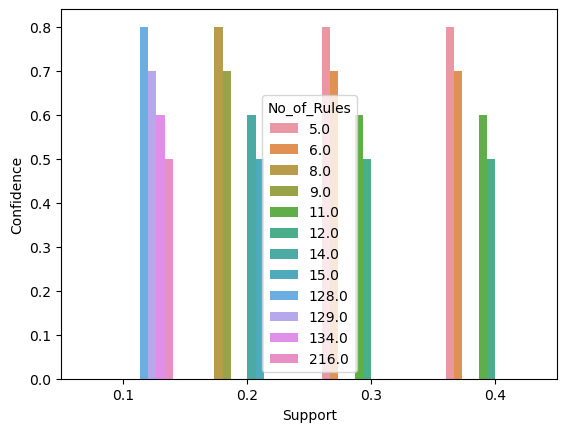

In [293]:
fig.figsize = (20,20)
sns.barplot(x ="Support" , y = "Confidence", data = results_df , hue ="No_of_Rules" )

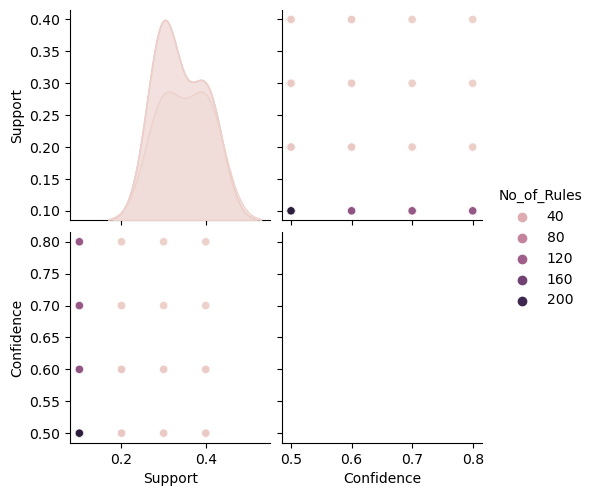

In [294]:
sns.pairplot(data = results_df , hue = 'No_of_Rules')